# Ocena jakości wina

Michał Wójcik - 307396

Filip Olejniczak - 307355

Szymon Szafrański - 307405

## Wprowadzenie

Tematem naszego projektu jest ocena jakości wina. Dane są zestawy danych dla wina czerwonego i białego. Analizę przeprowadzimy niezależnie dla obydwu zestawów danych. O jakości wina świadczy atrybut decydujący "quality", mówiący o jakości wina w skali 0-10.

## Analiza eksploracyjna

In [1]:
# Załadowanie potrzebnych bibliotek
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Na początek wczytamy obydwa zestawy danych.

In [2]:
red_dataset = pd.read_csv('winequality-red.csv', sep=';')
white_dataset = pd.read_csv('winequality-white.csv', sep=';')

Ponieważ chcemy dokonać niezależnej analizy dwóch zbiorów danych, wspomożemy się funkcją, która pozwoli nam wywoływać każdą inną funkcję jednokrotnie, a które będzie wykonywała daną funkcję dla obydwu zestawów danych.

In [3]:
def call(func, print_name = True):
    if print_name:
        print('Czerwone wino:')
    func(red_dataset)
    if print_name:
        print('\n\nBiałe wino:')
    func(white_dataset)

Dwa zestawy danych, na których będziemy operować prezentują się następująco:

In [4]:
red_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Zaczniemy od wyświetlenia podstawowych informacji o zestawach danych.

In [6]:
def print_column_info(df):
    print(df.info())
    
call(print_column_info)

Czerwone wino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


Białe wino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (tota

In [7]:
def print_description(df):
    print(df.describe())
    
call(print_description)

Czerwone wino:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.

In [8]:
def print_info(df):
    print('Liczba atrybutów:', df.shape[1])
    print('Liczba klas:', df.iloc[:,-1].unique().shape[0])
    print('Liczba obiektów:', df.shape[0])
    print('Liczba brakujących obiektów:', df.isnull().sum().sum())
    print('Liczba obiektów w klasach:')
    class_names = df.iloc[:,-1].unique()
    class_names.sort()
    for i in list(class_names):
        print(i, '-', df[df.iloc[:,-1] == i].shape[0])

call(print_info)

Czerwone wino:
Liczba atrybutów: 12
Liczba klas: 6
Liczba obiektów: 1599
Liczba brakujących obiektów: 0
Liczba obiektów w klasach:
3 - 10
4 - 53
5 - 681
6 - 638
7 - 199
8 - 18


Białe wino:
Liczba atrybutów: 12
Liczba klas: 7
Liczba obiektów: 4898
Liczba brakujących obiektów: 0
Liczba obiektów w klasach:
3 - 20
4 - 163
5 - 1457
6 - 2198
7 - 880
8 - 175
9 - 5


W opisie zestawów danych i podstawowych informacji o nich widzimy niepokającą sytuację: rozkład ilości obiektów w klasach wydaje się być bardzo nierówny. Potwierdzają to również kwartyle atrybutu jakości w obydwu zestawach danych: w obydwu przypadkach mają one tylko wartości 5 i 6, a przecież istnieją też obiekty o jakościach 3 i nawet 9. Postanowiliśmy więc narysować wykresy rozkładu atrybutu jakości.

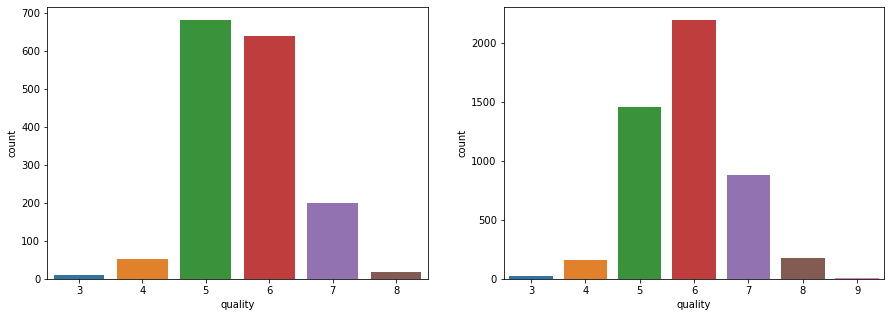

In [9]:
def show_quality_distribution(df):
    sns.countplot(x=df['quality'])
    
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
show_quality_distribution(red_dataset)
plt.subplot(1, 2, 2)
show_quality_distribution(white_dataset)

Jak widać nasze obawy były słuszne. W obydwu zestawach danych dominującymi wartościami sa 5 i 6, a obiektów o pozostałych jakościach jest o wiele mniej. Na przykład w przypadku wina białego obiektów o jakości 9 jest tylko 5. Z tego powodu utworzony model może bardzo niedokładnie przypisywać odpowiednie jakości winom lepszej i gorszej jakości. Postanowiliśmy więc górne i dolne jakości połączyć w jedne, dzieląc tym samym zestawy danych na jakości "bad", "medium" i "good" zamiast skali 0-10.

In [10]:
def group_qualities(df):
    bins = (0, 5, 6, 10)
    group_names = ['bad', 'medium', 'good']
    df['quality level'] = pd.cut(df['quality'], bins = bins, labels = group_names)
    print('Liczba obiektów w klasach:')
    for i in list(group_names):
        print(i, '-', df[df.iloc[:,-1] == i].shape[0])
    
call(group_qualities)

Czerwone wino:
Liczba obiektów w klasach:
bad - 744
medium - 638
good - 217


Białe wino:
Liczba obiektów w klasach:
bad - 1640
medium - 2198
good - 1060


Jak widzimy, udało nam się dzięki temu osiągnąć pożądany efekt - rozłożenie obiektów w poszczególnych klasach jakości jest teraz o wiele równiejsze.

Następnie zbadaliśmy zmienność każdego atrybutu w zależności klasy, w celu odkrycia, które atrybuty mogą być przydatne przy rozróżnianiu klasy jakości wina.

In [11]:
def show_violinplot(df):
    df_tmp = df.drop(columns = ['quality'])
    atrybuty = list(df_tmp.columns)
    plt.figure(figsize = (15, 15))
    for index, attribute in enumerate(atrybuty[:-1]):
        plt.subplot(4, 3, index + 1)
        sns.violinplot(x='quality level', y=attribute, data=df_tmp)

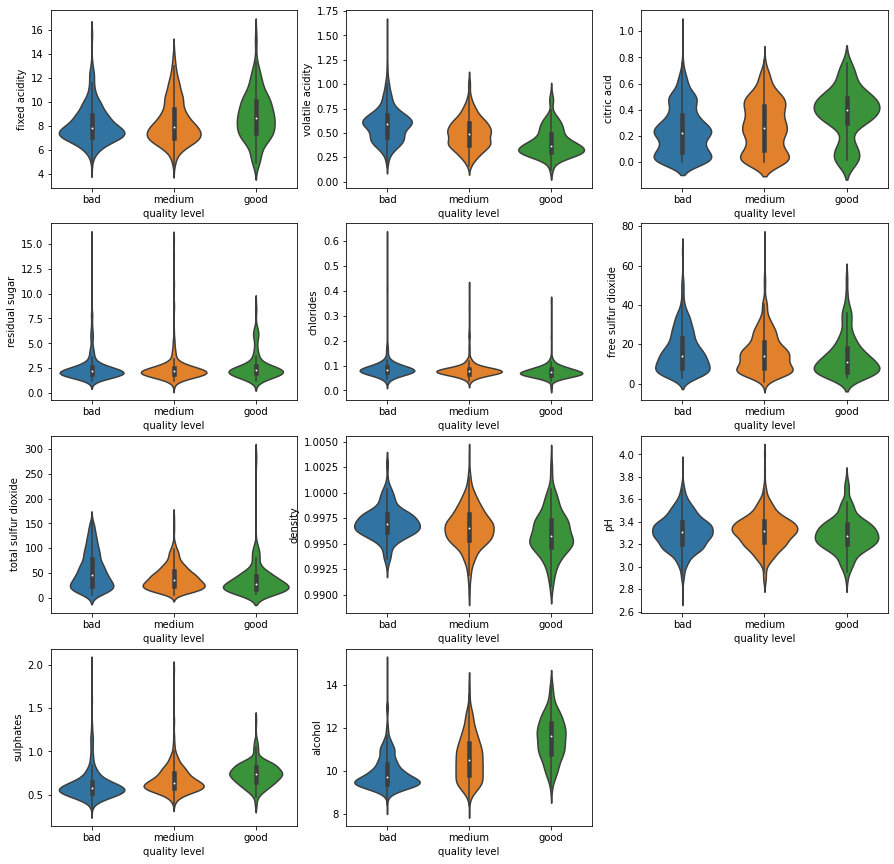

In [12]:
show_violinplot(red_dataset)

Na podstawie wykresów skrzypcowych pokazujących dystrybucję wartości atrybutów dla win czerwonych z podziałem na wartości atrybutu decyzyjnego można stwierdzić, że im mniejsza wartość atrybutu volatile acidity oraz im większa wartość atrybutu alcohol, tym lepsza jakość wina czerwonego. Zatem atrybutami, które posłużą do kwalifikacji jakości win białych są atrybuty volatile acidity oraz alcochol.

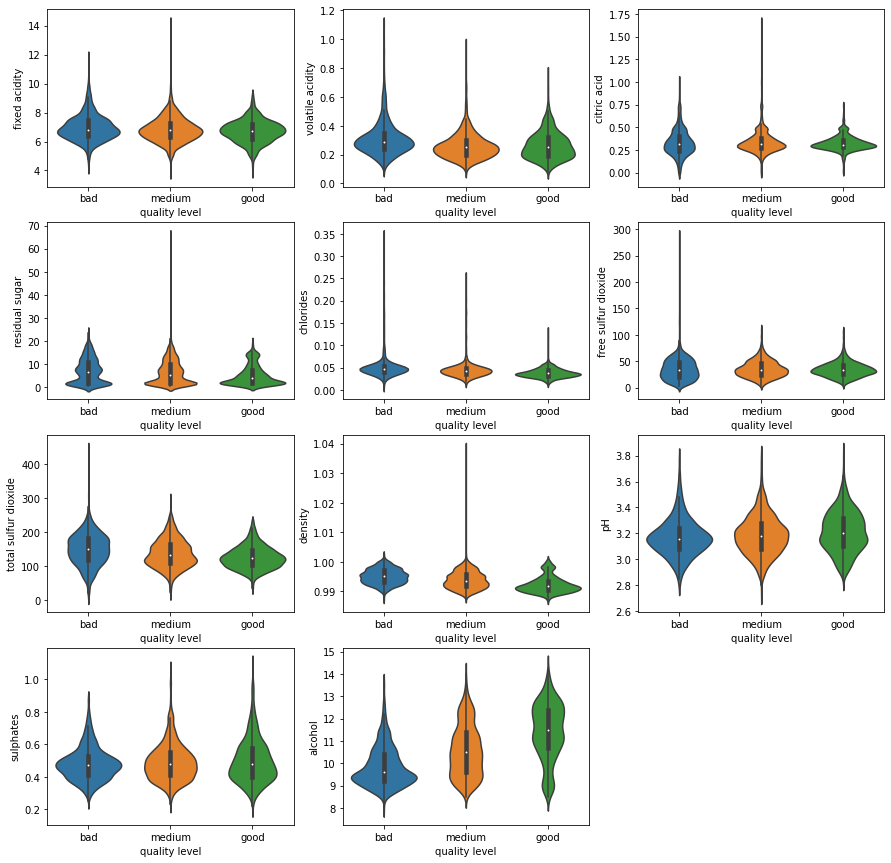

In [13]:
show_violinplot(white_dataset)

Na podstawie wykresów skrzypcowych pokazujących dystrybucję wartości atrybutów dla win białych z podziałem na wartości atrybutu decyzyjnego można stwierdzić, że im większa wartość atrybutu alcohol, tym lepsza jakość wina czerwonego. Problemem jest znalezienie drugiego atrybutu, którego użyjemy do klasyfikacji jakości wina. ciężko wyróżnić atrybuty, które przyjmują różne zakresy wartości dla różnych klas. Dla pojedynczych wartości odchylonych wykresy skrzypcowe są bardzo spłaszczone, a przez ograniczenie się do podziału na 3 klasy ciężej jest dostrzec jakąkolwiek tendencję zmian atrybutów. Z tego powodu, postanowiliśmy narysować dla zestawu win białych wykresy pudełkowe z oryginalnym podziałem na klasy jakości

In [14]:
def show_boxplot(df):
    df_tmp = df.drop(columns = ['quality level'])
    atrybuty = list(df_tmp.columns)
    plt.figure(figsize = (15, 15))
    for index, attribute in enumerate(atrybuty[:-1]):
        plt.subplot(4, 3, index + 1)
        sns.boxplot(x='quality', y=attribute, data=df_tmp, showfliers=False)

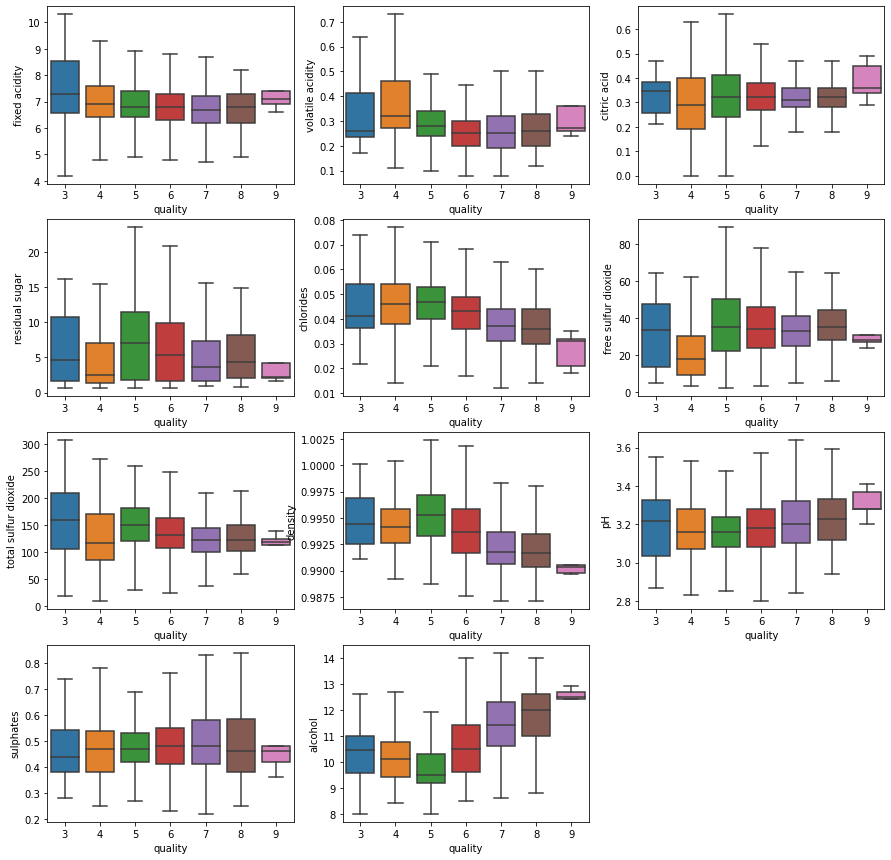

In [15]:
show_boxplot(white_dataset)

Na podstawie wykresów pudełkowych dla win białych można zauważyć, że im mniejsza wartość atrybutu chlorides, tym lepsza jakość wina. Zatem atrybutami, które posłużą do kwalifikacji jakości win białych są atrybuty chlorides oraz alcochol.

In [16]:
def show_heat_map(df):
    dane_mapa = df.drop(columns=['quality level', 'quality'])
    corr = dane_mapa.corr()
    plt.figure(figsize = (15, 12))
    sns.heatmap(corr, annot = corr)
    plt.show()

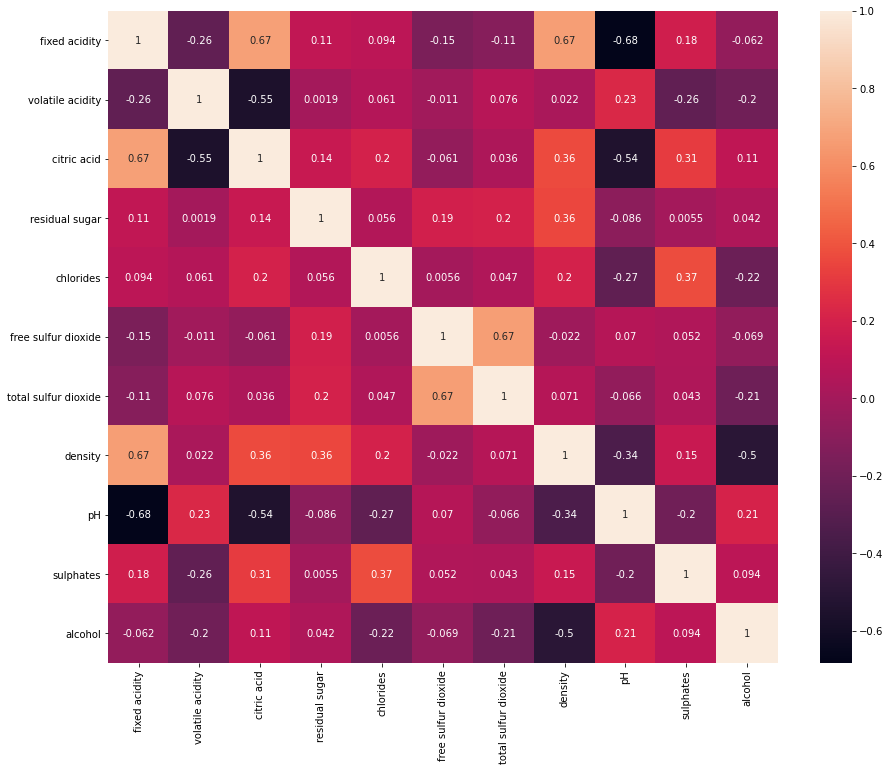

In [17]:
show_heat_map(red_dataset)

Dla win czerwonych korelacja atrybutów alcochol i volatile acidity wynosi 0,068 - korelacja między wybranymi atrybutami jest znikoma, zatem możemy zastosować te oba atrybuty do klasyfikacji.

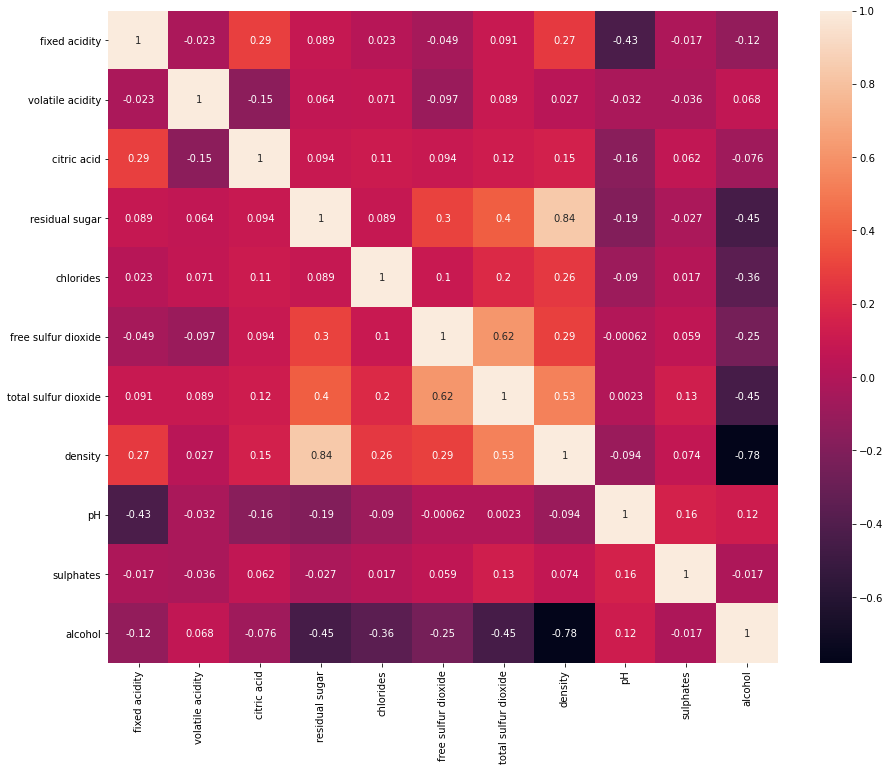

In [18]:
show_heat_map(white_dataset)

Dla win białych korelacja atrybutów alcohol i chlorides wynosi -0,36 - korelacja między wybranymi atrybutami nie jest za duża oraz na podstawie wykresów skrzypcowych i pudełkowych można stwierdzić, że jest to najlepsza para atrybutów do rozróżniania jakości wina. 

In [19]:
def show_pairplot(df):
    df_tmp = df.drop(columns='quality')
    sns.pairplot(df_tmp, kind='scatter', hue = 'quality level')
    plt.show()

In [20]:
# call(show_pairplot)

Macierz wykresów punktowych nie daje nam możliwości wyboru dwóch najlepszych atrybutów dla tych zbiorów, ponieważ nie ma widocznego podziału punktów na określone klasy dla żadnej pary atrybutów.

## Utworzenie modeli

In [21]:
# Załadowanie potrzebnych bibliotek
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

Przy budowaniu modeli i wybieraniu klasyfikatory będziemy używali już tylko naszego zawężonego zakresu jakości (bad, medium, good), więc możemy się pozbyć pierwotnej kolumny.

In [22]:
def remove_quality(df):
    df.drop(columns = ['quality'], inplace = True)

call(remove_quality, False)

Jak widzieliśmy na początku zakresy zmienności atrybutów znacznie się różnią, np. atrybut "total sulfer dioxide" ma wartości w przedziale 6-289, natomiast niektóre inne atrybuty mają wartości w przedziale 0-1. Z tego powodu postanowiliśmy ustandaryzować wartości atrybutów, aby klasyfikacja dała lepsze wyniki (ma to wpływ np. na miary odległości).

In [23]:
def standardize_data(df):
    df = df.copy()
    wine_quality_columns = df.pop('quality level')
    names = df.columns
    scaler = preprocessing.StandardScaler()
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = names)
    df['quality level'] = wine_quality_columns
    
call(standardize_data, False)

Przy tworzeniu modeli i ich weryfikacji posłużymy się funkcjami pomocniczymi, które poznaliśmy na zajęciach.

Pierwsza funkcja podzieli nam zbiór wejściowy na zbiór uczący i testowy, według zadanej proporcji.

In [24]:
def podziel(df,proporcja):
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1], test_size=proporcja, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

Druga funkcja będzie nam służyła do weryfikacji poprawności danego modelu. Będzie wypisywała macierz pomyłek oraz tzw. accuracy score, który powie nam o dokładności modelu w przypisywaniu odpowiednich klas obiektom.

In [25]:
def weryfikuj(model,dane,atryb):
    model.fit(dane["opis_ucz"].loc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].loc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].loc[:,atryb])
    print("Accuracy score dla zbioru uczącego:", accuracy_score(dane["dec_ucz"],wynik_ucz))
    print("Macierz pomyłek dla zbioru uczącego:")
    print(pd.crosstab(dane["dec_ucz"],wynik_ucz))
    print("\nAccuracy score dla zbioru testowego:", accuracy_score(dane["dec_test"],wynik_test))
    print("Macierz pomyłek dla zbioru testowego:")
    print(pd.crosstab(dane["dec_test"],wynik_test))
    print('\n')

Ostatnia funkcja będzie rysowała wykres granic, który może się okazać przydatny przy ocenianiu jakości klasyfikacji.

In [26]:
def granice(model,dane,atr_x,atr_y,tytul,plots_width=1,plots_height=1,plot_number=1):
    dec_ucz = dane["dec_ucz"].astype('category').cat.codes.copy(deep = True)
    dec_test = dane["dec_test"].astype('category').cat.codes.copy(deep = True)
    model.fit(dane["opis_ucz"].loc[:,[atr_x,atr_y]], dec_ucz)
    x_min = min(dane["opis_ucz"].loc[:, atr_x].min(),dane["opis_test"].loc[:, atr_x].min())
    x_max = max(dane["opis_ucz"].loc[:, atr_x].max(),dane["opis_test"].loc[:, atr_x].max())
    y_min = min(dane["opis_ucz"].loc[:, atr_y].min(),dane["opis_test"].loc[:, atr_y].min())
    y_max = max(dane["opis_ucz"].loc[:, atr_y].max(),dane["opis_test"].loc[:, atr_y].max())
    rozst_x = x_max - x_min
    rozst_y = y_max - y_min
    x_min = x_min - 0.1*rozst_x
    x_max = x_max + 0.1*rozst_x
    y_min = y_min - 0.1*rozst_y
    y_max = y_max + 0.1*rozst_y
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150), np.arange(y_min, y_max, (y_max-y_min)/150))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(plots_width, plots_height, plot_number)
    plt.title(tytul)
    plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].loc[:, atr_x], dane["opis_ucz"].loc[:, atr_y], c=dec_ucz, marker = '.')
    plt.scatter(dane["opis_test"].loc[:, atr_x], dane["opis_test"].loc[:, atr_y], c=dec_test, marker = 'x')

Dla obydwu zestawów danych przetestujemy te same klasyfikatory, jednak najpierw utworzymy wszystkie modele dla wina czerwonego, a następnie dla białego.

Klasyfikatory, których użyjemy to:
* drzewo decyzyjne
* klasyfikator k-najbliższych sąsiadów
* klasyfikator najbliższego prototypu
* naiwnego klasyfikator Bayesa

Ponieważ dla każdego rodzaju wina przetestujemy te same klasyfikatory, postanowiliśmy napisać dla każdego z nich oddzielną funkcję:

In [27]:
# 1. Drzewa decyzyjne
def drzewa_decyzyjne(podzielony, atrybut_x, atrybut_y):
    depths = range(2, 10)
    plot_number = 1
    plt.figure(dpi = 100, figsize = (12, 9), tight_layout = True)
    for depth in depths:
        drzewo = tree.DecisionTreeClassifier(max_depth=depth)
        tekst = "Drzewo o głębokości " + str(depth)
        granice(drzewo, podzielony, atrybut_x, atrybut_y, tekst, 3, 3, plot_number)
        print(tekst)
        weryfikuj(drzewo, podzielony, [atrybut_x,atrybut_y])
        plot_number += 1

In [28]:
# 2. Naiwny klasyfikator Bayesa
def bayes(podzielony, atrybut_x, atrybut_y):
    model_B = GaussianNB()
    plt.figure(dpi = 100)
    granice(model_B, podzielony, atrybut_x, atrybut_y,"Klasyfikator Bayesa")
    print('Naiwny klasyfikator Bayesa')
    weryfikuj(model_B, podzielony,[atrybut_x,atrybut_y])

In [29]:
# 3. Klasyfikator najbliższego sąsiada i klasyfikator k-najbliższych sąsiadów
def k_neighbours(podzielony, atrybut_x, atrybut_y):
    plot_number = 1
    plt.figure(dpi = 100, figsize = (12, 12), tight_layout = True)
    for index, k in enumerate([1, 3]):
        model_knn = KNeighborsClassifier(n_neighbors=k)
        tekst = 'Klasyfikator ' + str(k) + '-NN'
        granice(model_knn, podzielony, atrybut_x, atrybut_y, tekst, 2, 2, plot_number)
        weryfikuj(model_knn, podzielony, [atrybut_x, atrybut_y])
        plot_number += 1

In [30]:
# 4. Metoda najbliższych prototypów
def nearest_prototypes(podzielony, atrybut_x, atrybut_y):
    model_nc = NearestCentroid()
    tekst = 'Klasyfikator najbliższego prototypu'
    plt.figure(dpi = 100)
    granice(model_nc, podzielony, atrybut_x, atrybut_y, tekst)
    print(tekst)
    weryfikuj(model_nc, podzielony, [atrybut_x, atrybut_y])

### Wino czerwone

Zaczniemy od podzielenia zbioru wejściowego na zbiór uczący i testowy w stosunku 70/30 i utworzenia zmiennych dla wybranych przez nas atrybutów.

In [31]:
podzielony = podziel(red_dataset, 0.3)
atrybut_x = 'alcohol'
atrybut_y = 'volatile acidity'

Teraz przejdziemy do badania kolejnych klasyfikatorów.

Drzewo o głębokości 2
Accuracy score dla zbioru uczącego: 0.5817694369973191
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            426    18      74
medium         233    75     126
good            31    99      37

Accuracy score dla zbioru testowego: 0.5729166666666666
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            190    14      22
medium          95    48      61
good             8    24      18


Drzewo o głębokości 3
Accuracy score dla zbioru uczącego: 0.6157283288650581
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            400    18     100
medium         169    75     190
good            14    99      54

Accuracy score dla zbioru testowego: 0.6020833333333333
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            175 

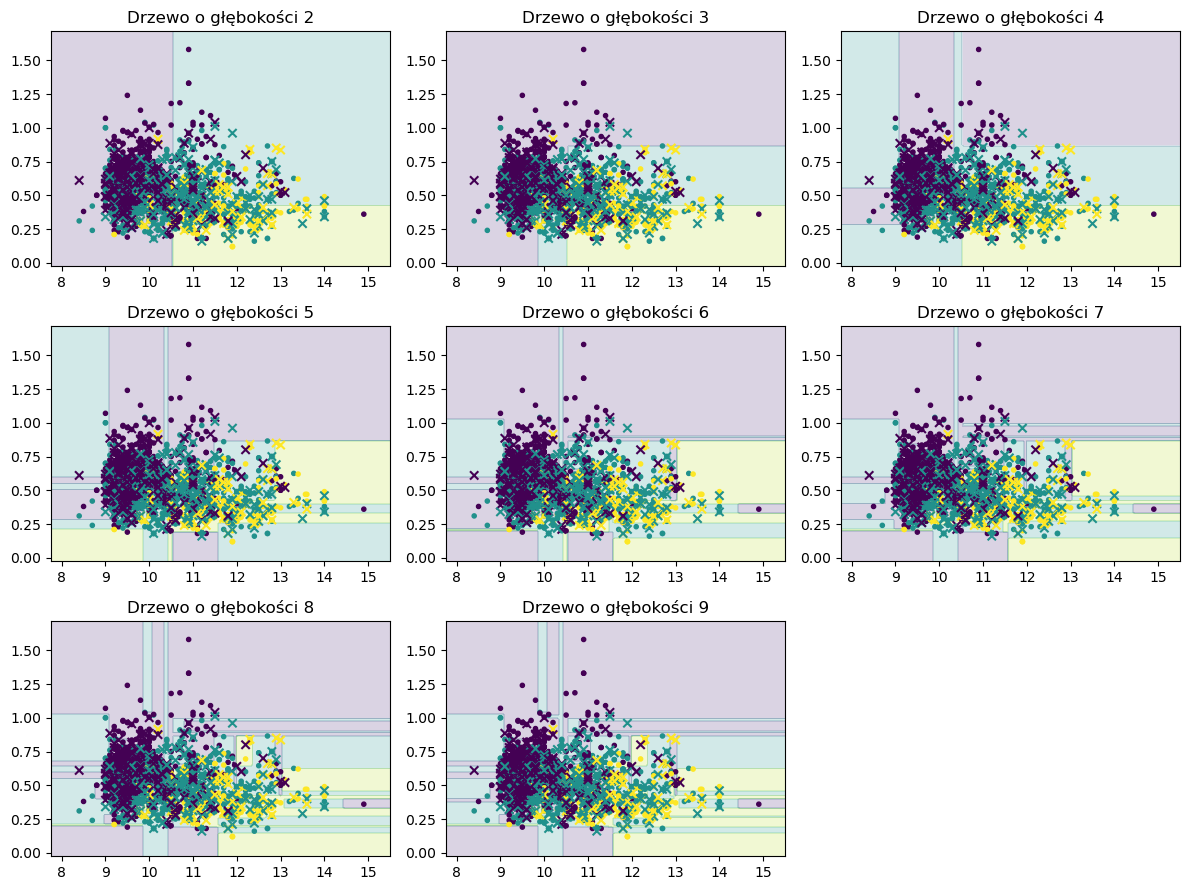

In [32]:
drzewa_decyzyjne(podzielony, atrybut_x, atrybut_y)

*skopiowane od wina białego - trzeba jeszcze raz przeanalizować*

Naiwny klasyfikator Bayesa
Accuracy score dla zbioru uczącego: 0.5978552278820375
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            427     7      84
medium         211    51     172
good            26    70      71

Accuracy score dla zbioru testowego: 0.6
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            184     6      36
medium          87    32      85
good             5    19      26




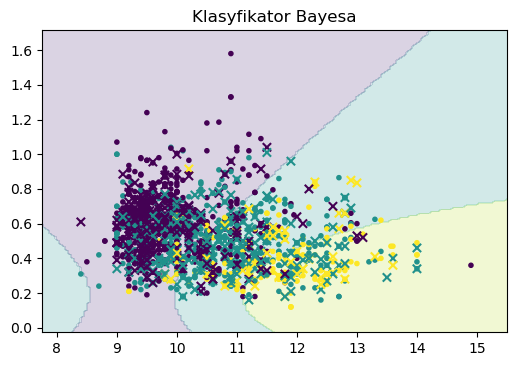

In [33]:
bayes(podzielony, atrybut_x, atrybut_y)

Accuracy score dla zbioru uczącego: 0.9106344950848972
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            476     8      34
medium          33    16     385
good             2   158       7

Accuracy score dla zbioru testowego: 0.6
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            146    14      66
medium          53    35     116
good             8    26      16


Accuracy score dla zbioru uczącego: 0.7783735478105451
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            455     7      56
medium         108    31     295
good            21   121      25

Accuracy score dla zbioru testowego: 0.5708333333333333
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            155    14      57
medium          73    33      98
good        

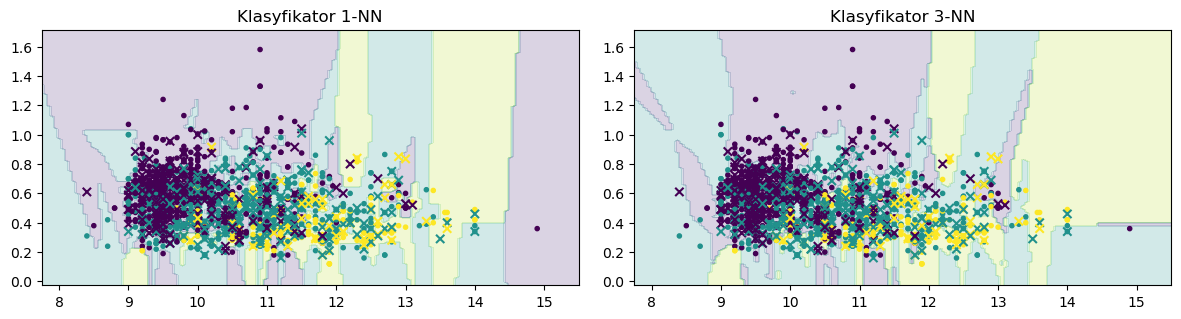

In [34]:
k_neighbours(podzielony, atrybut_x, atrybut_y)

Klasyfikator najbliższego prototypu
Accuracy score dla zbioru uczącego: 0.5361930294906166
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            382    43      93
medium         187   135     112
good            22   106      39

Accuracy score dla zbioru testowego: 0.5666666666666667
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            173    19      34
medium          73    71      60
good             5    39       6




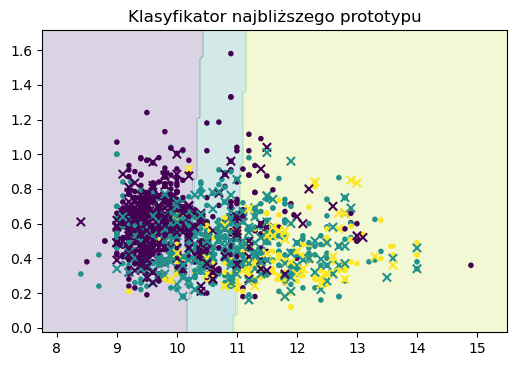

In [35]:
nearest_prototypes(podzielony, atrybut_x, atrybut_y)

*skopiowane od wina białego - trzeba jeszcze raz przeanalizować*

### Wino białe

Zaczniemy od podzielenia zbioru wejściowego na zbiór uczący i testowy w stosunku 70/30 i utworzenia zmiennych dla wybranych przez nas atrybutów.

In [36]:
podzielony = podziel(white_dataset, 0.3)
atrybut_x = 'alcohol'
atrybut_y = 'chlorides'

Teraz przejdziemy do badania kolejnych klasyfikatorów.

Drzewo o głębokości 2
Accuracy score dla zbioru uczącego: 0.530338389731622
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            663    10     440
medium         499    81     988
good            99   167     481

Accuracy score dla zbioru testowego: 0.5217687074829932
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            316     4     207
medium         196    38     396
good            41    55     217


Drzewo o głębokości 3
Accuracy score dla zbioru uczącego: 0.5320886814469078
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            663     7     443
medium         499    71     998
good            99   163     485

Accuracy score dla zbioru testowego: 0.5244897959183673
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            316  

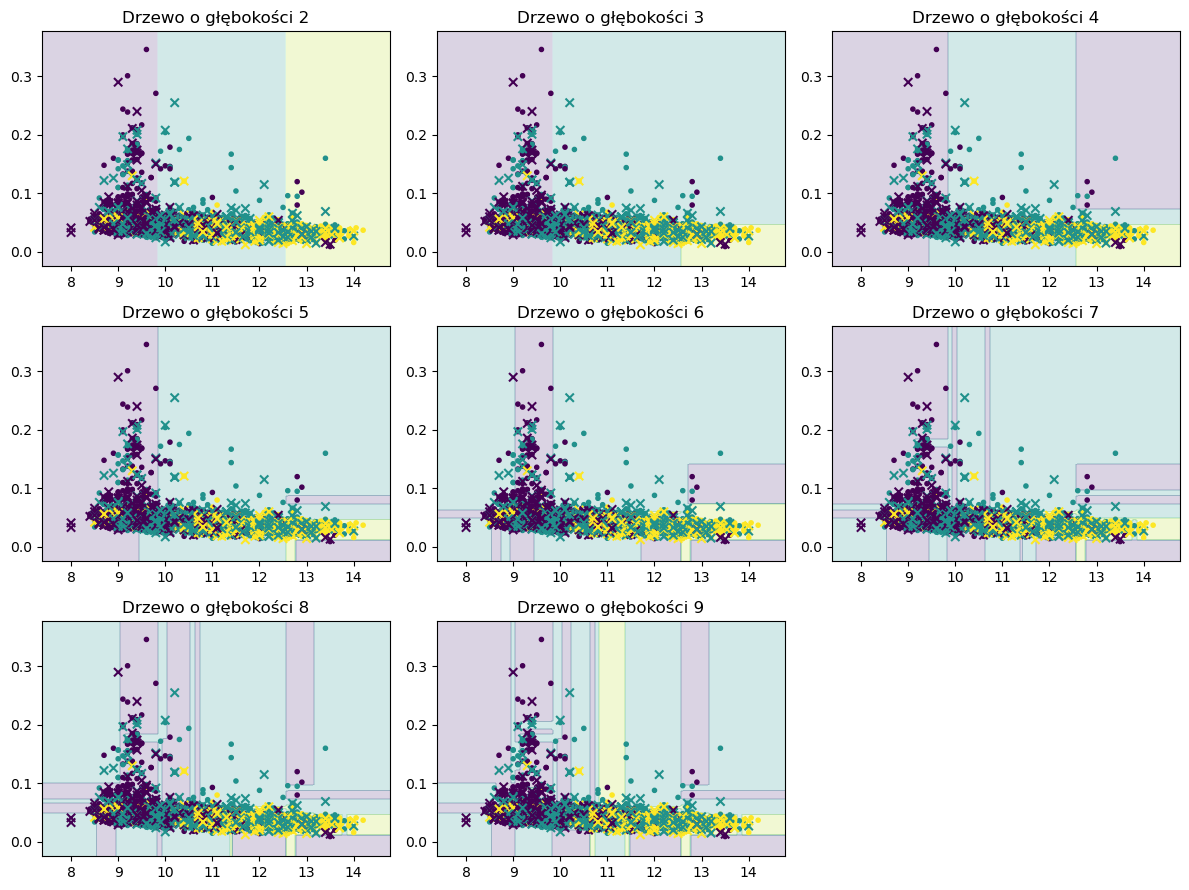

In [37]:
drzewa_decyzyjne(podzielony, atrybut_x, atrybut_y)

*UWAGA: ten komentarz był do zbioru wina czerwonego*

Jak możemy zaobserwować na wykresach granic oraz macierzach pomyłek, metoda drzew decyzyjnych nie jest dobrym klasyfikatorem dla tego zbioru. Największą poprawność w klasyfikacji na zbiorze testowym osiąga drzewo o głębokości 2, dla którego wartość współczynnika accuracy wynosi około 0,6. Dla większych głębokości najprawdopodobniej następuje efekt przeuczenia, co wynika z dużo większego współczynnika poprawności klasyfikacji dla zbioru uczącego w stosunku do zbioru testowego. Na wykresach granic tych głębokości możemy również zaobserwować tendencję do wydzielania jednokolorowych obszarów, zawierających pojedyncze punkty, co również świadczy o efekcie przeuczenia.

Naiwny klasyfikator Bayesa
Accuracy score dla zbioru uczącego: 0.5087514585764294
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            314    63     736
medium         193   333    1042
good            65   388     294

Accuracy score dla zbioru testowego: 0.4741496598639456
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            144    27     356
medium          74   149     407
good            22   146     145




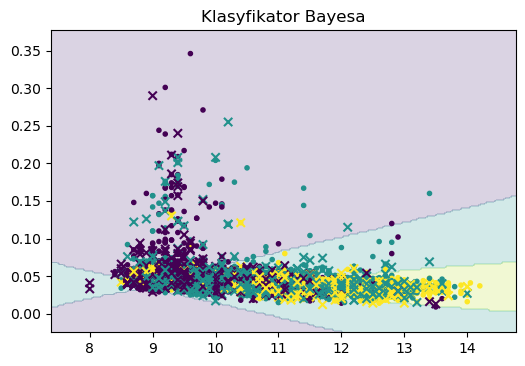

In [38]:
bayes(podzielony, atrybut_x, atrybut_y)

*UWAGA: ten komentarz był do zbioru wina czerwonego*

Naiwny klasyfikator Bayesa klasyfikuje z poprawnością równą około 0,6 na zbiorze testowym. Stosunkowo duży błąd w tej klasyfikacji może wynikać z korelacji między wybranymi przez nas atrybutami (wynoszącej -0,36). Klasyfikator Bayesa zakłada bowiem niezależność atrybutów od siebie nawzajem.

Accuracy score dla zbioru uczącego: 0.7103267211201867
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            767    81     265
medium         268   163    1137
good            50   531     166

Accuracy score dla zbioru testowego: 0.5129251700680272
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            272    57     198
medium         183   122     325
good            40   157     116


Accuracy score dla zbioru uczącego: 0.69049008168028
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            784    45     284
medium         326   126    1116
good           120   467     160

Accuracy score dla zbioru testowego: 0.5006802721088436
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            287    37     203
medium         222    99     309

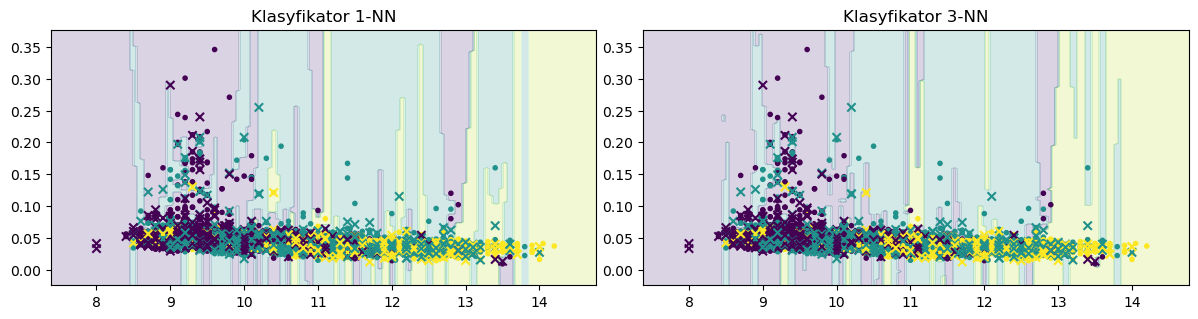

In [39]:
k_neighbours(podzielony, atrybut_x, atrybut_y)

Klasyfikator najbliższego prototypu
Accuracy score dla zbioru uczącego: 0.48337222870478413
Macierz pomyłek dla zbioru uczącego:
col_0          bad  good  medium
quality level                   
bad            799   122     192
medium         684   504     380
good           129   478     140

Accuracy score dla zbioru testowego: 0.4816326530612245
Macierz pomyłek dla zbioru testowego:
col_0          bad  good  medium
quality level                   
bad            386    55      86
medium         282   214     134
good            55   188      70




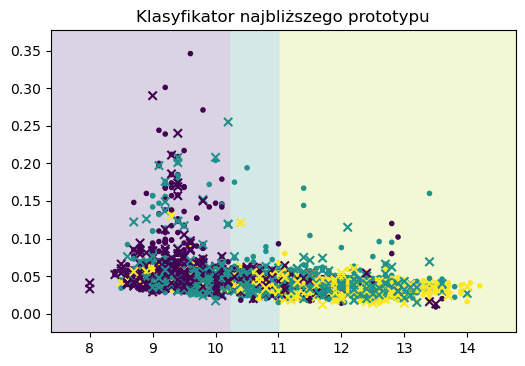

In [40]:
nearest_prototypes(podzielony, atrybut_x, atrybut_y)